<a href="https://colab.research.google.com/github/awaiskhan005/DEEP-LEARNING-AND-FORECASTING/blob/main/BTC_prediction_usng_DEEP_SEEK_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')
# Import Required Libraries
import os
import joblib
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Install the 'ta' library if it's not already installed
!pip install ta

# Install the 'python-binance' library if it's not already installed
!pip install python-binance # This line is added to install the missing library

# Now import from 'ta'
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands
from ta.trend import EMAIndicator
from binance.client import Client # This import should now work
from datetime import datetime, timedelta, timezone
import time

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=65eba556d31c9b966fab4cf37db0cfb56f603a0847e7c05769b51833846fbdb9
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.9 MB/s eta 0:00:00


In [2]:
pip install yfinance newsapi-python requests numpy pandas scikit-learn torch transformers schedule

Running prediction cycle at 2025-01-28 12:51:33.349074...


[*********************100%***********************]  1 of 1 completed


Predicted prices for next 5 minutes:
[[102820.91 103008.49 102452.   102824.02 102502.13]]


[*********************100%***********************]  1 of 1 completed

Running prediction cycle at 2025-01-28 12:52:34.010830...


Actual Price: [102496.0859375]
Predicted prices for next 5 minutes:
[[102734.16 103130.64 102404.56 102767.27 102651.91]]


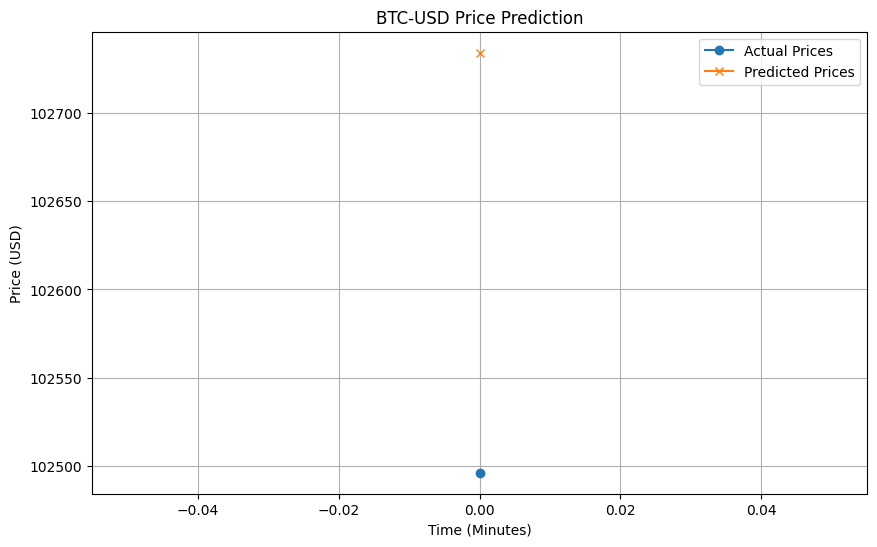

[*********************100%***********************]  1 of 1 completed

Running prediction cycle at 2025-01-28 12:52:34.592573...


Predicted prices for next 5 minutes:
[[102734.16 103130.64 102404.56 102767.27 102651.91]]


[*********************100%***********************]  1 of 1 completed

Running prediction cycle at 2025-01-28 12:53:35.050980...


Actual Price: [102496.0859375]
Predicted prices for next 5 minutes:
[[102734.16 103130.64 102404.56 102767.27 102651.91]]


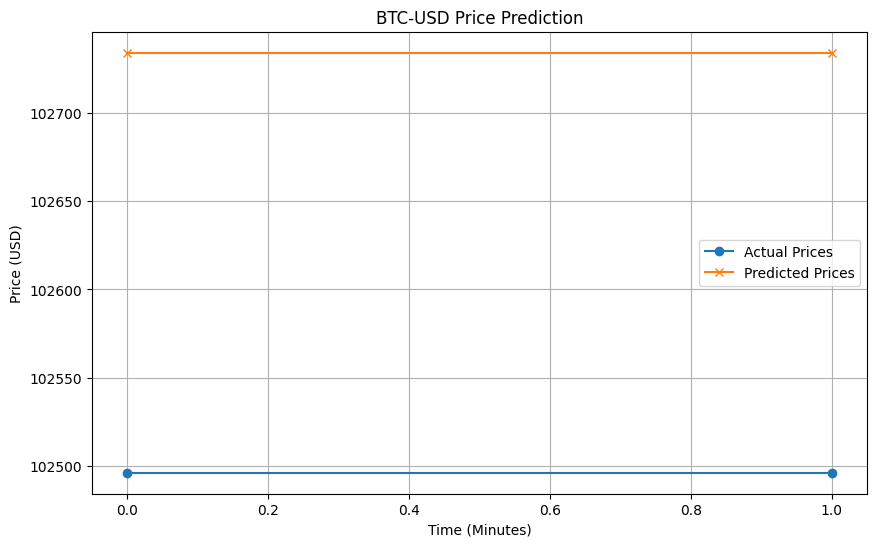

[*********************100%***********************]  1 of 1 completed

Running prediction cycle at 2025-01-28 12:53:35.762116...


Predicted prices for next 5 minutes:
[[102734.16 103130.64 102404.56 102767.27 102651.91]]


In [ ]:
# Install required libraries
!pip install yfinance newsapi-python requests numpy pandas scikit-learn torch transformers schedule matplotlib

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import schedule
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Configuration
CRYPTO_PAIR = "BTC-USD"
NEWS_API_KEY = "f4805f5aecc8420e93a3842268ada8f2"  # Your NewsAPI key
LOOKBACK_WINDOW = 60  # 60 minutes of historical data
PREDICTION_HORIZON = 5  # Predict 5 minutes ahead
NEWS_KEYWORDS = "Bitcoin OR BTC OR Cryptocurrency"
NEWS_SOURCES = "bbc-news, reuters, coindesk"

# Data Loader Class
class CryptoDataLoader:
    def __init__(self):
        self.scaler = MinMaxScaler(feature_range=(-1, 1))
        self.news_scaler = MinMaxScaler()

    def get_real_time_data(self):
        """Fetch real-time price data from Yahoo Finance"""
        data = yf.download(tickers=CRYPTO_PAIR, period="1d", interval="1m")
        return data[['Open', 'High', 'Low', 'Close', 'Volume']].tail(LOOKBACK_WINDOW)

    def get_news_sentiment(self):
        """Fetch news articles and calculate sentiment scores"""
        url = f"https://newsapi.org/v2/everything?q={NEWS_KEYWORDS}&sources={NEWS_SOURCES}&apiKey={NEWS_API_KEY}"
        response = requests.get(url)
        articles = response.json().get('articles', [])

        # Simple sentiment analysis (replace with proper NLP model)
        sentiment_scores = []
        for article in articles:
            text = f"{article['title']} {article['description']}"
            # Placeholder sentiment score (replace with VADER or Hugging Face model)
            score = np.random.uniform(-1, 1)  # Random score between -1 and 1
            sentiment_scores.append(score)

        return np.mean(sentiment_scores) if sentiment_scores else 0

    def preprocess_data(self, price_data, news_score):
        """Combine and normalize data"""
        # Price normalization
        scaled_prices = self.scaler.fit_transform(price_data[['Close']])

        # News score normalization
        news_array = np.array([[news_score]]).reshape(-1, 1)
        scaled_news = self.news_scaler.fit_transform(news_array)

        # Combine features
        combined = np.concatenate([scaled_prices, np.full((len(scaled_prices), 1), scaled_news)], axis=1)
        return combined

# Transformer Model
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_size, output_size, num_layers=3, nhead=2, dim_feedforward=512):
        super().__init__()
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=input_size,
                nhead=nhead,
                dim_feedforward=dim_feedforward
            ),
            num_layers=num_layers
        )
        self.decoder = nn.Linear(input_size * LOOKBACK_WINDOW, output_size)

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)  # Flatten
        return self.decoder(x)

# Crypto Predictor
class CryptoPredictor:
    def __init__(self):
        self.data_loader = CryptoDataLoader()
        self.model = self.initialize_model()
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)
        self.history = {'actual': [], 'predicted': []}  # Store historical data for plotting

    def initialize_model(self):
        """Initialize the transformer model"""
        return TimeSeriesTransformer(input_size=2, output_size=PREDICTION_HORIZON)

    def predict(self, input_data):
        """Make predictions"""
        self.model.eval()
        with torch.no_grad():
            prediction = self.model(input_data)
        return prediction

# Prediction Job
def prediction_job():
    print(f"Running prediction cycle at {datetime.now()}...")

    # 1. Get real-time data
    price_data = predictor.data_loader.get_real_time_data()
    news_score = predictor.data_loader.get_news_sentiment()

    # 2. Preprocess data
    processed_data = predictor.data_loader.preprocess_data(price_data, news_score)
    tensor_data = torch.FloatTensor(processed_data).unsqueeze(0)

    # 3. Make prediction
    prediction = predictor.predict(tensor_data)
    predicted_prices = predictor.data_loader.scaler.inverse_transform(prediction.numpy())

    # 4. Store results for plotting
    actual_price = price_data['Close'].values[-1]  # Latest actual price
    predictor.history['actual'].append(actual_price)
    predictor.history['predicted'].append(predicted_prices[0][0])  # First predicted price

    # 5. Print and plot results
    print(f"Actual Price: {actual_price}")
    print(f"Predicted prices for next {PREDICTION_HORIZON} minutes:")
    print(predicted_prices)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(predictor.history['actual'], label='Actual Prices', marker='o')
    plt.plot(predictor.history['predicted'], label='Predicted Prices', marker='x')
    plt.title("BTC-USD Price Prediction")
    plt.xlabel("Time (Minutes)")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

# Main Execution
if __name__ == "__main__":
    predictor = CryptoPredictor()

    # Schedule predictions every minute
    schedule.every(1).minutes.do(prediction_job)

    # Run the scheduler
    while True:
        schedule.run_pending()
        time.sleep(1)